In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('smart_logistics_dataset.csv')
data.head()

Timestamp  Asset_ID  Inventory_Level Shipment_Status  Temperature  \
0  20-03-2024 00:11   Truck_7              390         Delayed         27.0   
1  30-10-2024 07:53   Truck_6              491      In Transit         22.5   
2  29-07-2024 18:42  Truck_10              190      In Transit         25.2   
3  28-10-2024 00:50   Truck_9              330       Delivered         25.4   
4  27-09-2024 15:52   Truck_7              480         Delayed         20.5   

   Humidity Traffic_Status  Waiting_Time  User_Transaction_Amount  \
0      67.8         Detour            38                      320   
1      54.3          Heavy            16                      439   
2      62.2         Detour            34                      355   
3      52.3          Heavy            37                      227   
4      57.2          Clear            56                      197   

   User_Purchase_Frequency Logistics_Delay_Reason  Asset_Utilization  \
0                        4                    NaN               60.1   
1                        7                Weather               80.9   
2                        3                    NaN               99.2   
3                        5                Traffic               97.4   
4                        6                    NaN               71.6   

   Demand_Forecast  Logistics_Delay  
0              285                1  
1              174                1  
2              260                0  
3              160                1  
4              270                1

In [3]:
data.duplicated().sum()

0

In [6]:
a = pd.DataFrame(np.round(data.isnull().mean()*100,2),columns = ['Null_percent'])
b = pd.DataFrame(data.isnull().sum(),columns = ['Null_count'])
c = pd.DataFrame(data.dtypes,columns = ['Data_Type'])
d = pd.DataFrame(data.nunique(),columns = ['nunique'])
e = pd.DataFrame(data.head(2).T)
e.columns = ['Sample1','Sample2']
info = pd.concat([a,b,c,d,e],axis =1)
info

Null_percent  Null_count Data_Type  nunique  \
Timestamp                         0.0           0    object     1000   
Asset_ID                          0.0           0    object       10   
Inventory_Level                   0.0           0     int64      366   
Shipment_Status                   0.0           0    object        3   
Temperature                       0.0           0   float64      121   
Humidity                          0.0           0   float64      291   
Traffic_Status                    0.0           0    object        3   
Waiting_Time                      0.0           0     int64       51   
User_Transaction_Amount           0.0           0     int64      365   
User_Purchase_Frequency           0.0           0     int64       10   
Logistics_Delay_Reason           26.3         263    object        3   
Asset_Utilization                 0.0           0   float64      366   
Demand_Forecast                   0.0           0     int64      200   
Logistics_Delay                   0.0           0     int64        2   

                                  Sample1           Sample2  
Timestamp                20-03-2024 00:11  30-10-2024 07:53  
Asset_ID                          Truck_7           Truck_6  
Inventory_Level                       390               491  
Shipment_Status                   Delayed        In Transit  
Temperature                          27.0              22.5  
Humidity                             67.8              54.3  
Traffic_Status                     Detour             Heavy  
Waiting_Time                           38                16  
User_Transaction_Amount               320               439  
User_Purchase_Frequency                 4                 7  
Logistics_Delay_Reason                NaN           Weather  
Asset_Utilization                    60.1              80.9  
Demand_Forecast                       285               174  
Logistics_Delay                         1                 1

In [7]:
data.columns

Index(['Timestamp', 'Asset_ID', 'Inventory_Level', 'Shipment_Status',
       'Temperature', 'Humidity', 'Traffic_Status', 'Waiting_Time',
       'User_Transaction_Amount', 'User_Purchase_Frequency',
       'Logistics_Delay_Reason', 'Asset_Utilization', 'Demand_Forecast',
       'Logistics_Delay'],
      dtype='object')

In [8]:
data.drop(columns = ['Timestamp'],inplace = True)

In [10]:
data.fillna({'Logistics_Delay_Reason':'no_reason'},axis = 0,inplace = True)

In [15]:
continuous = ['Inventory_Level','Temperature', 'Humidity','Waiting_Time','User_Transaction_Amount','Asset_Utilization','Demand_Forecast']
discrete = ['User_Purchase_Frequency']
ordinal = ['Shipment_Status','Traffic_Status']
nominal = ['Asset_ID','Logistics_Delay_Reason']

In [84]:
order1 = [['Delayed','In Transit','Delivered']]
order2 = [['Heavy','Detour','Clear']]

#### Univariant Analysis

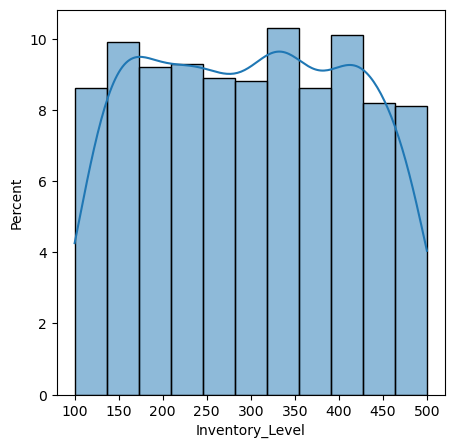

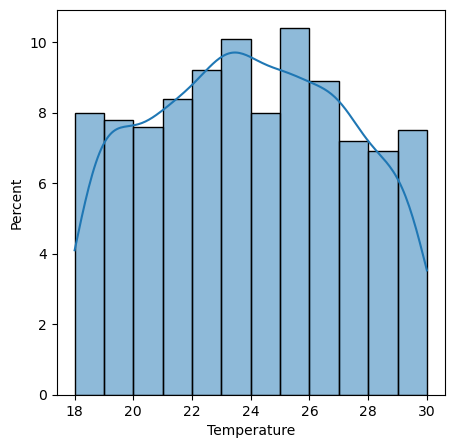

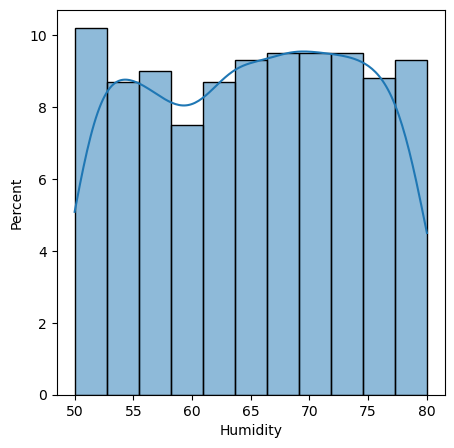

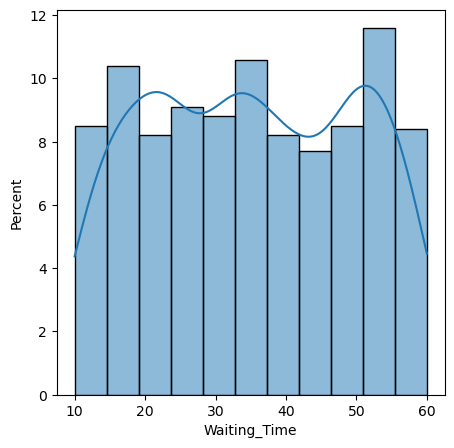

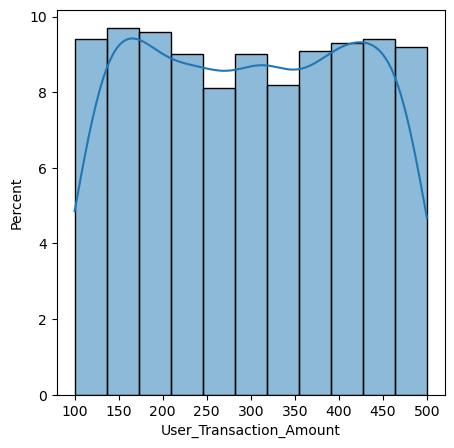

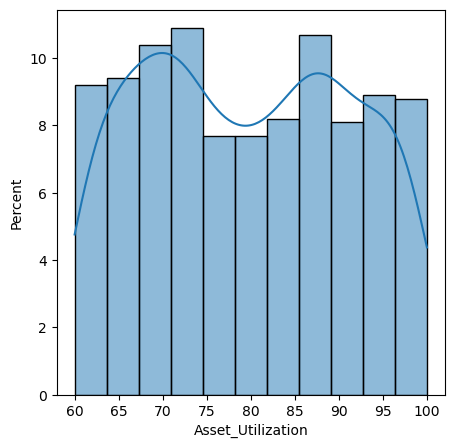

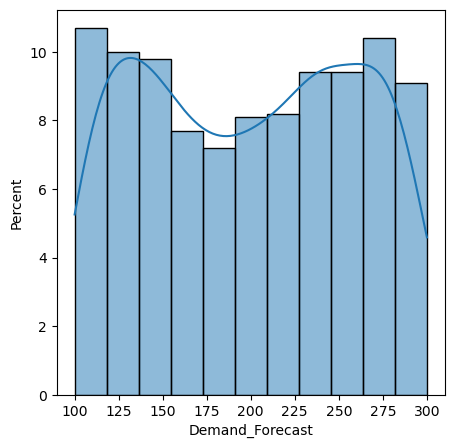

In [24]:
#Continuous
for i in continuous:
    plt.figure(figsize = (5,5))
    sns.histplot(x = i,data = data,bins = 'auto',kde = True,stat = 'percent')
    plt.show()

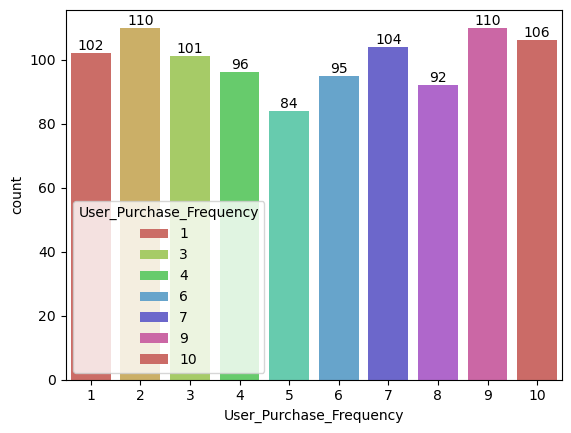

In [27]:
#Discrete
for i in discrete:
    ax = sns.countplot(x = i,data = data,hue = i,palette = 'hls')
    for j in ax.containers:
        ax.bar_label(j)
    plt.show()

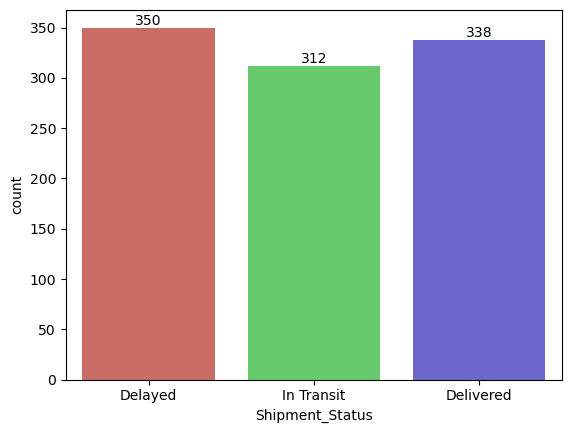

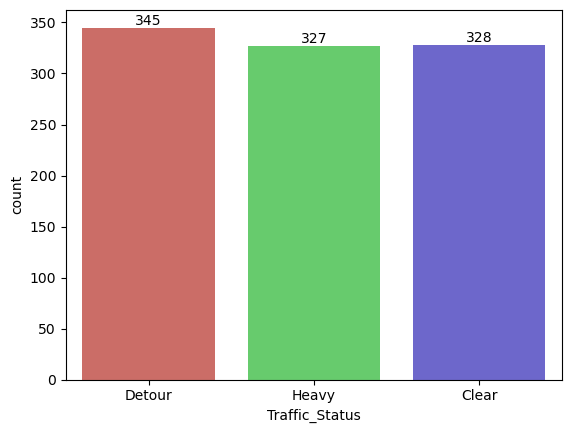

In [28]:
#ordinal
for i in ordinal:
    ax = sns.countplot(x = i,data = data,hue = i,palette = 'hls')
    for j in ax.containers:
        ax.bar_label(j)
    plt.show()

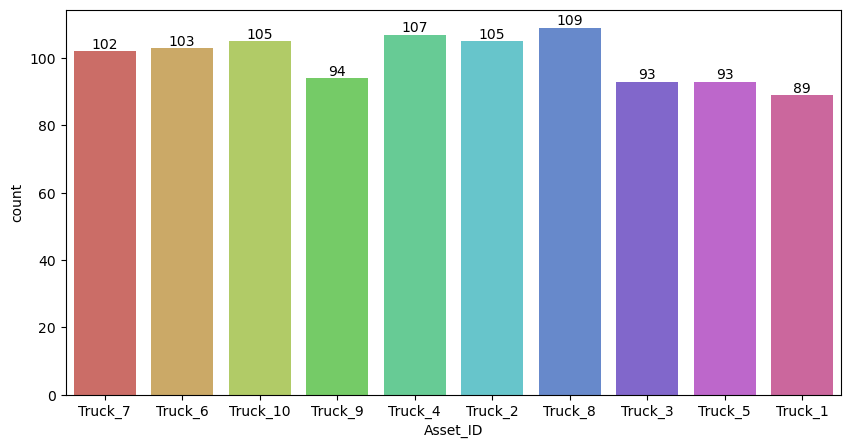

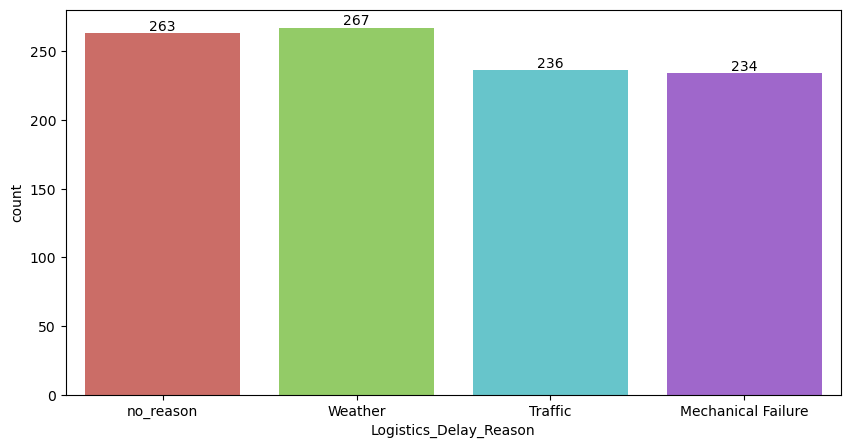

In [30]:
#nominal
for i in nominal:
    plt.figure(figsize = (10,5))
    ax = sns.countplot(x = i,data = data,hue = i,palette = 'hls')
    for j in ax.containers:
        ax.bar_label(j)
    plt.show()

#### Bivariant Analysis

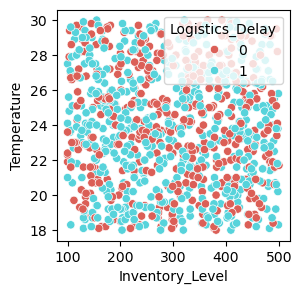

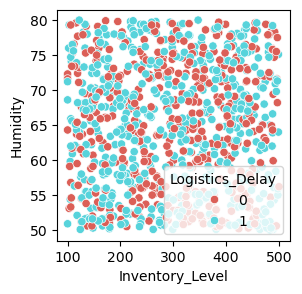

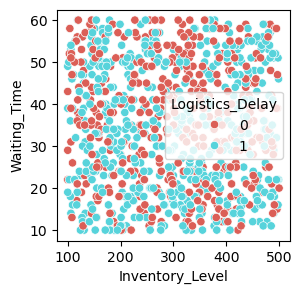

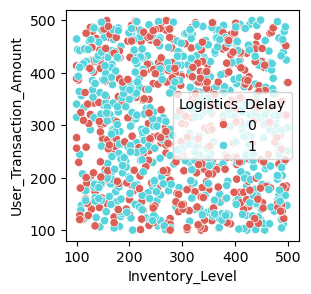

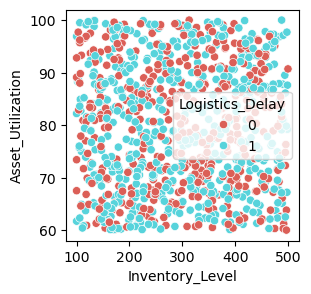

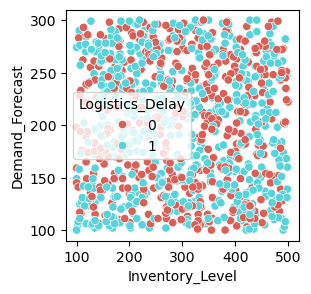

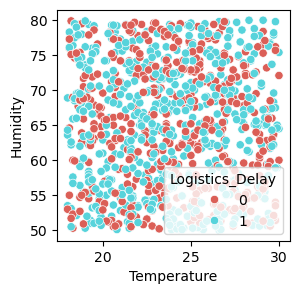

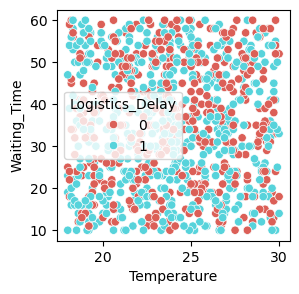

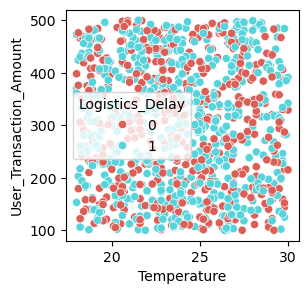

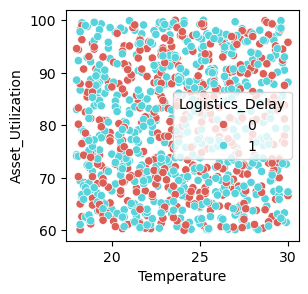

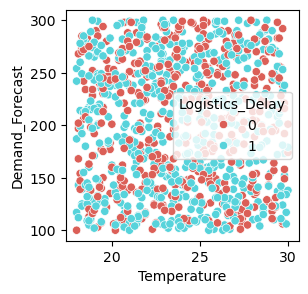

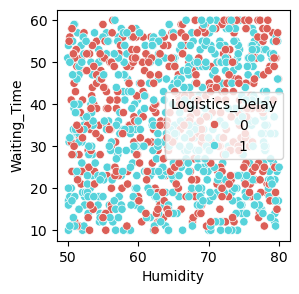

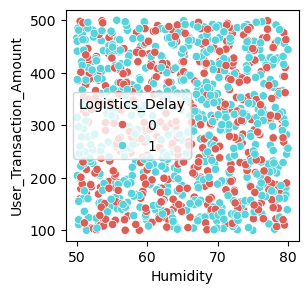

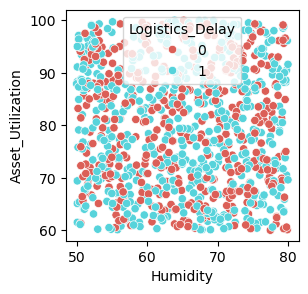

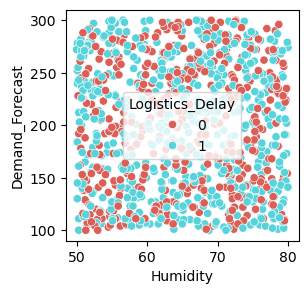

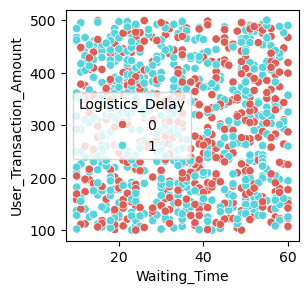

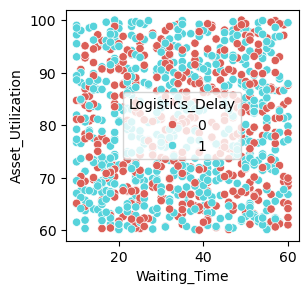

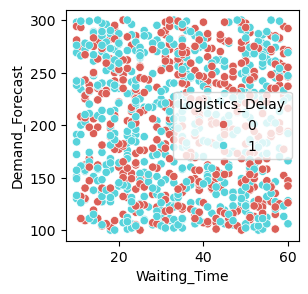

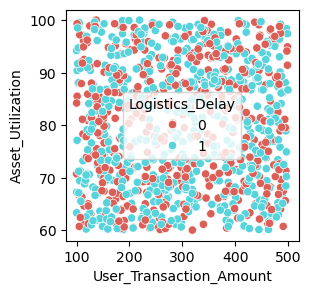

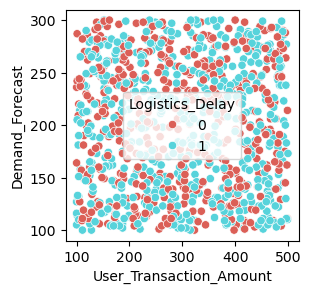

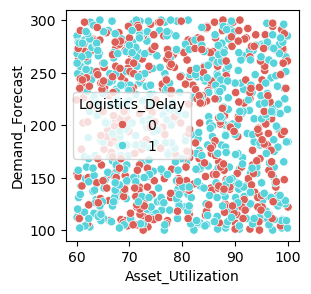

In [37]:
for i in range(len(continuous)):
    for j in range(i+1,len(continuous)):
        plt.figure(figsize=(3,3))
        sns.scatterplot(x = continuous[i],y = continuous[j],data = data,hue = 'Logistics_Delay',palette = 'hls')
        plt.show()

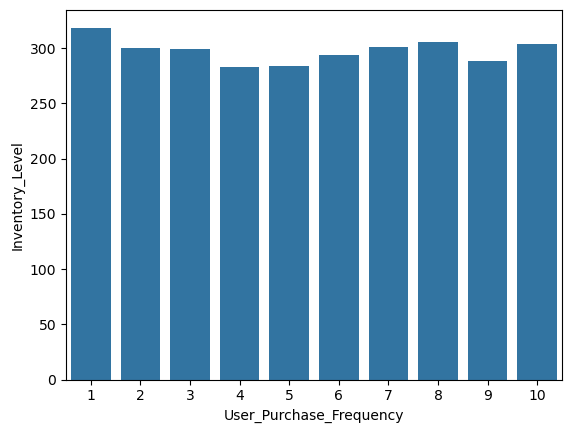

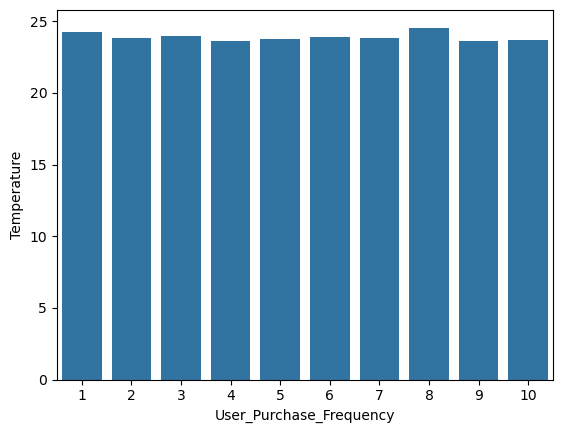

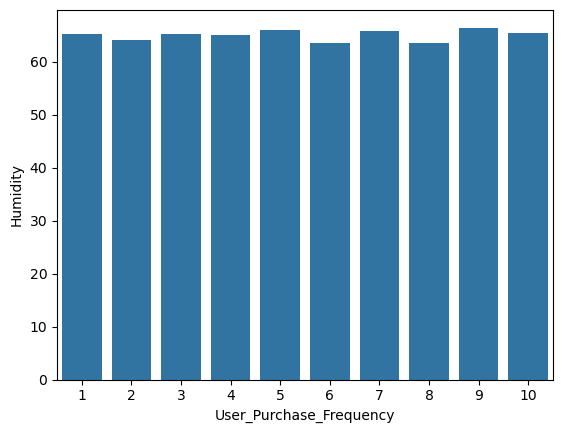

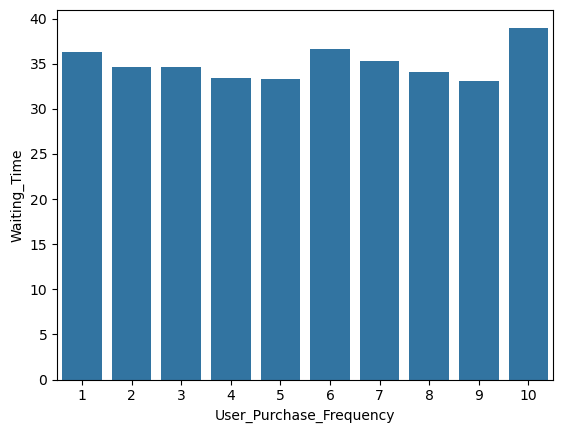

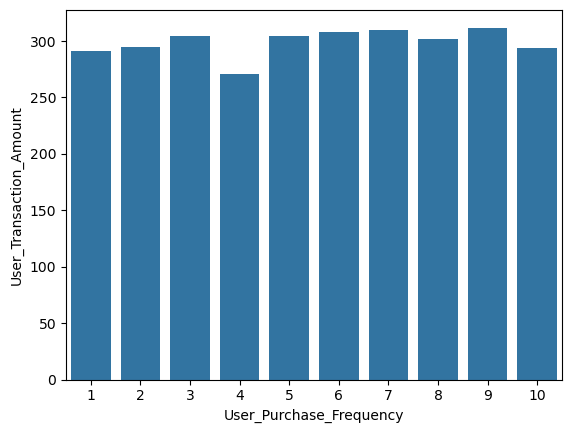

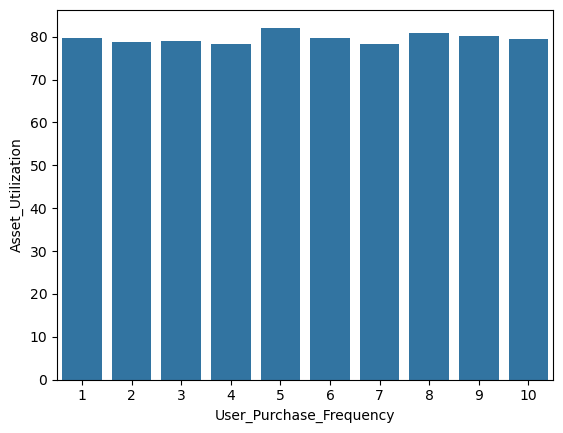

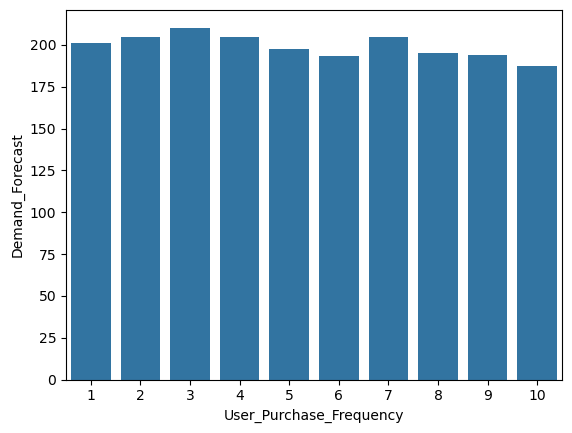

In [42]:
for i in discrete:
    for j in continuous:
        sns.barplot(x = i,y = j,data = data,ci = False)
        plt.show()

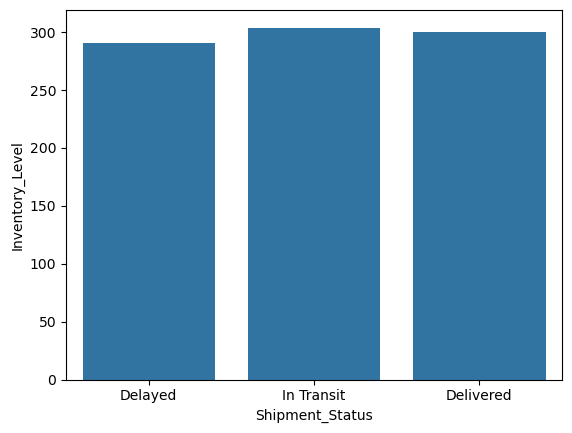

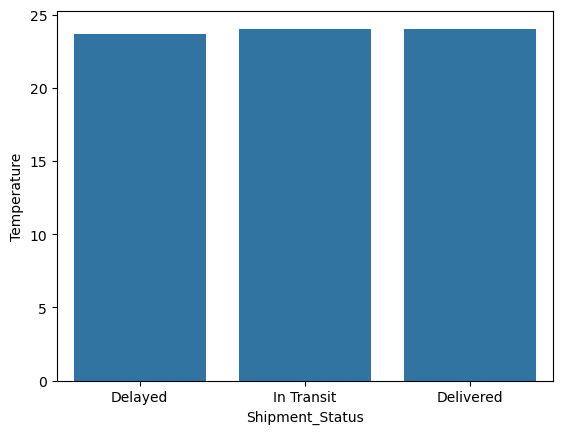

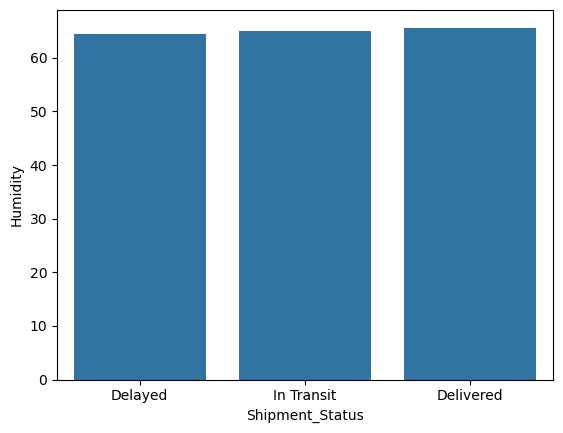

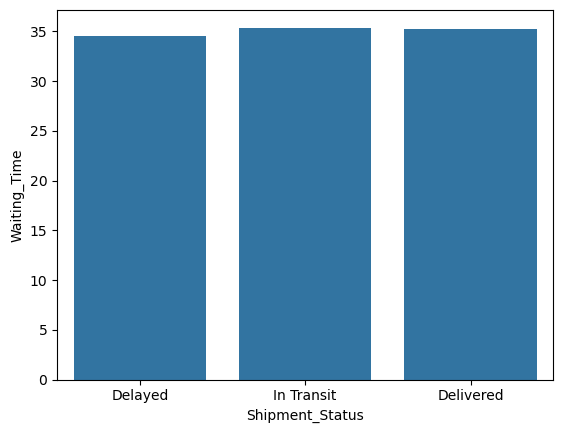

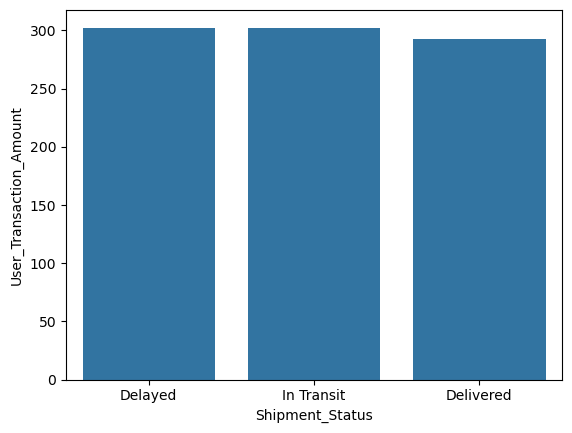

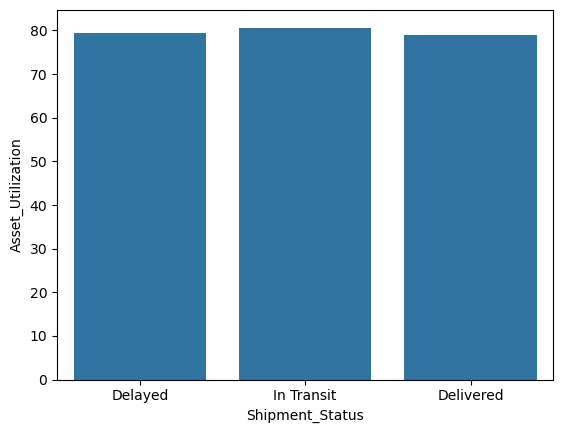

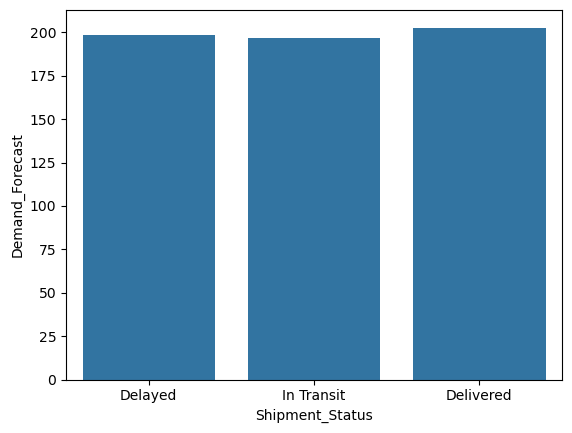

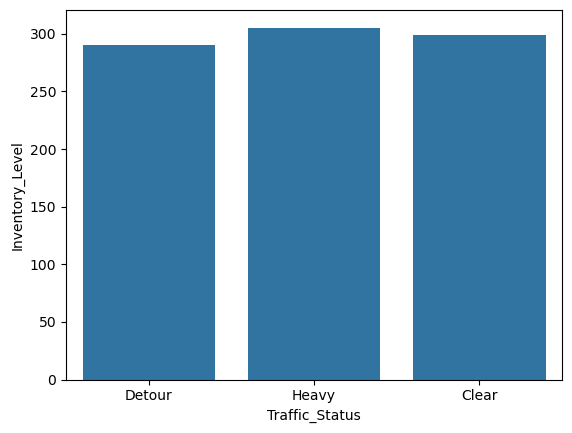

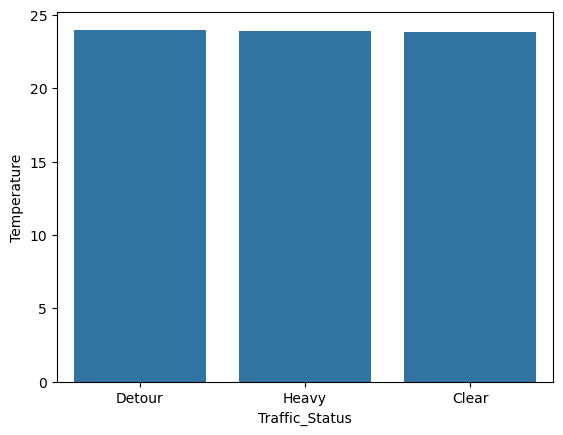

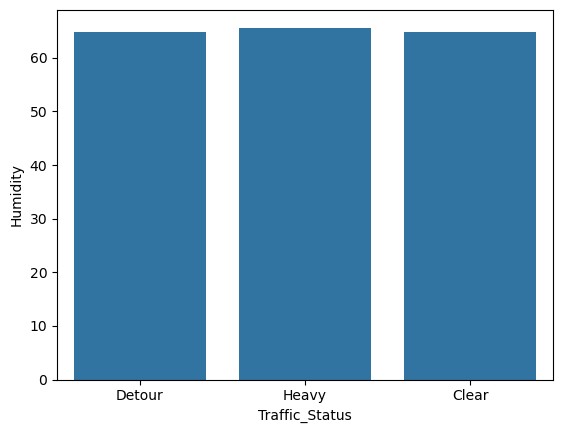

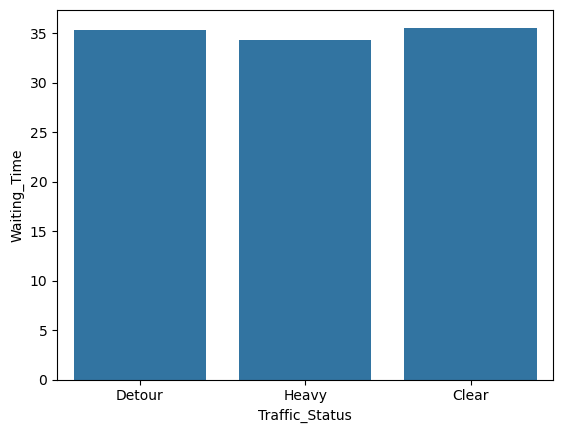

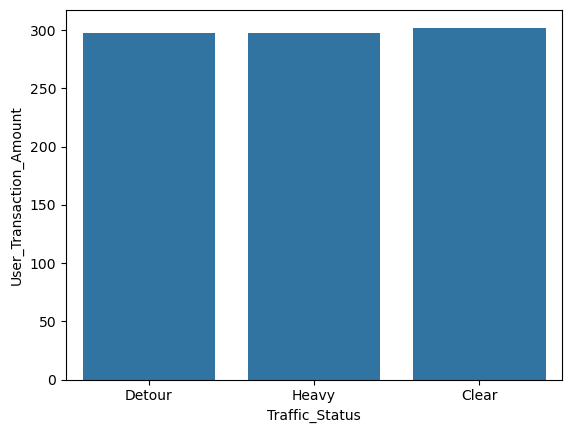

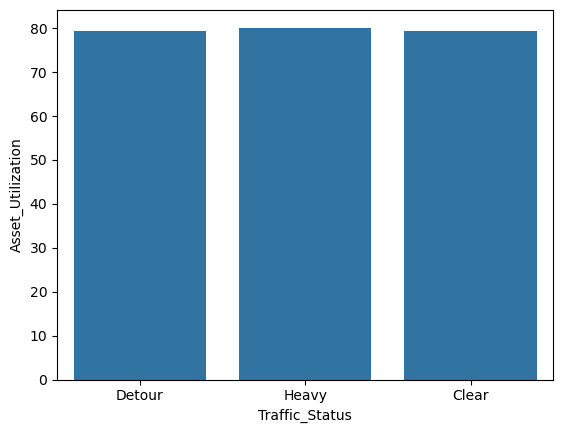

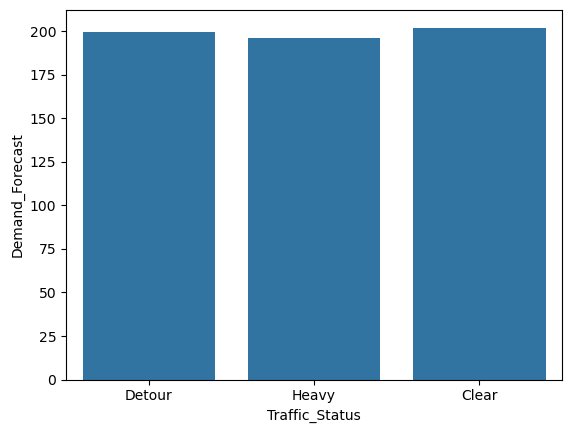

In [43]:
for i in ordinal:
    for j in continuous:
        sns.barplot(x = i,y = j,data = data,ci = False)
        plt.show()

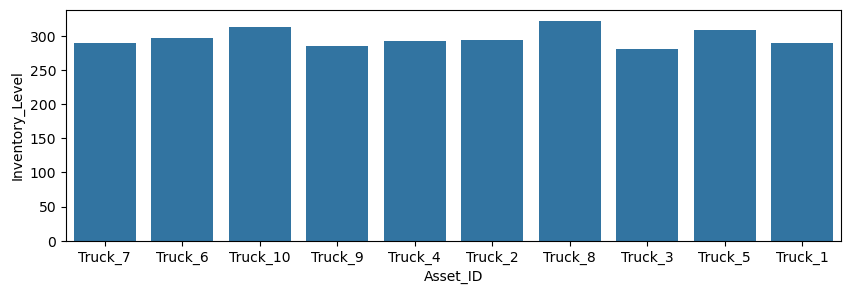

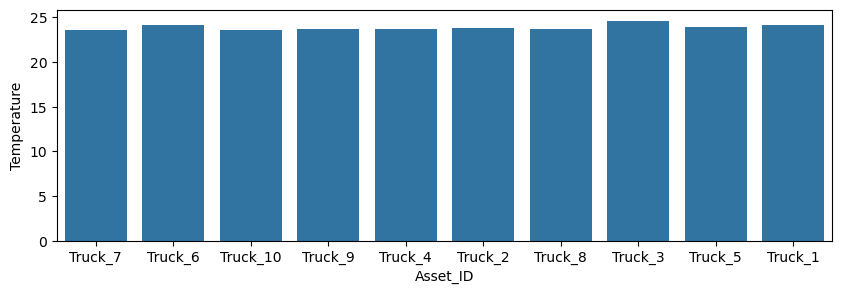

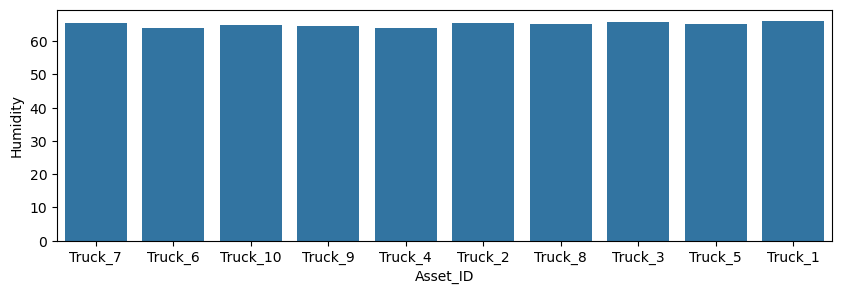

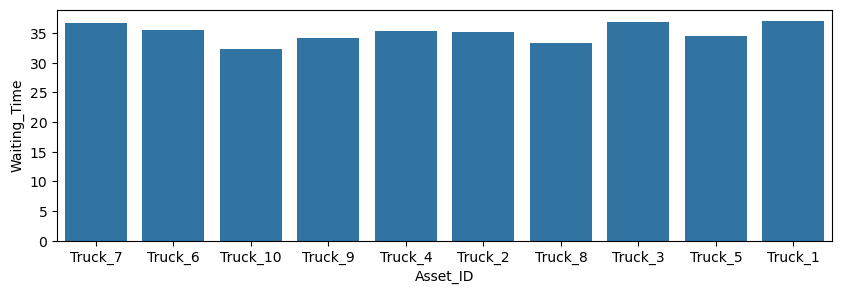

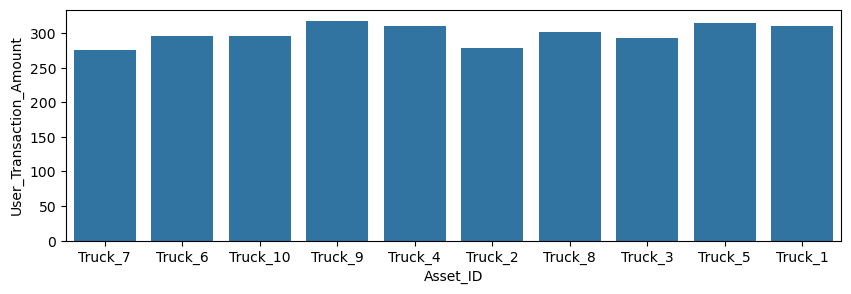

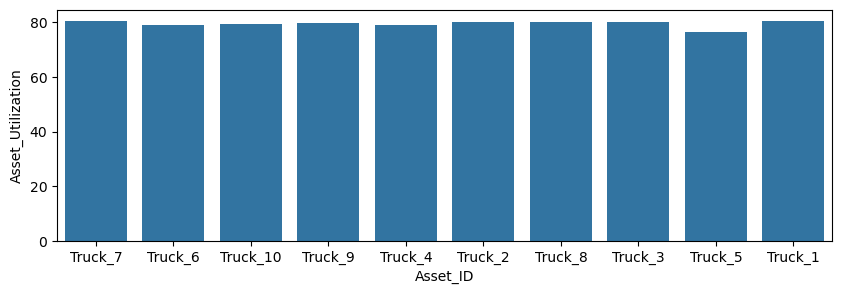

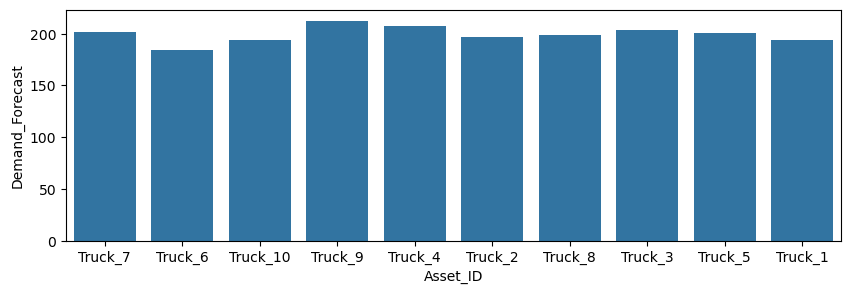

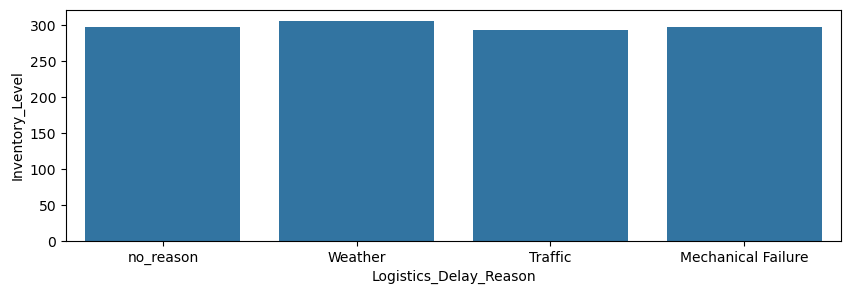

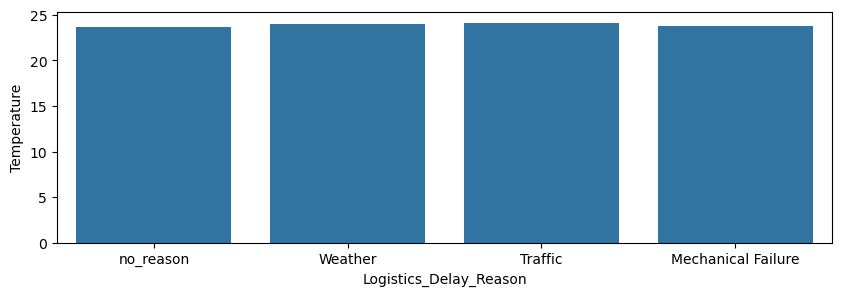

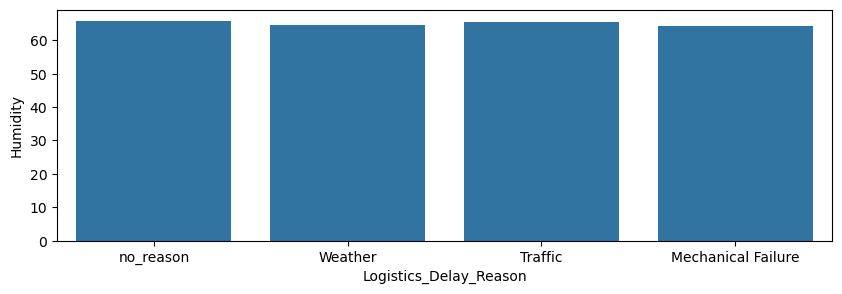

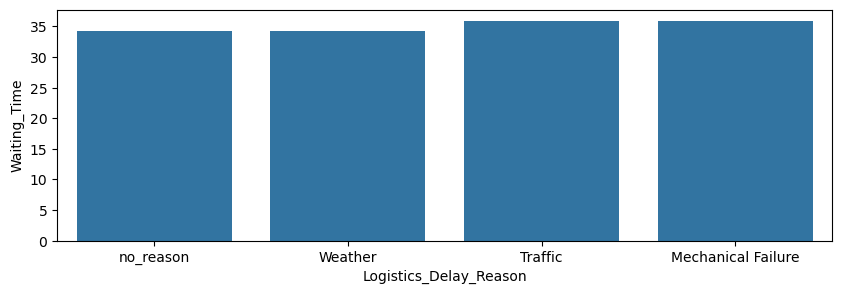

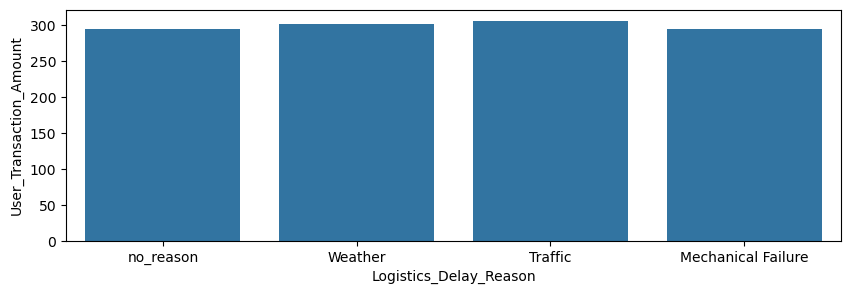

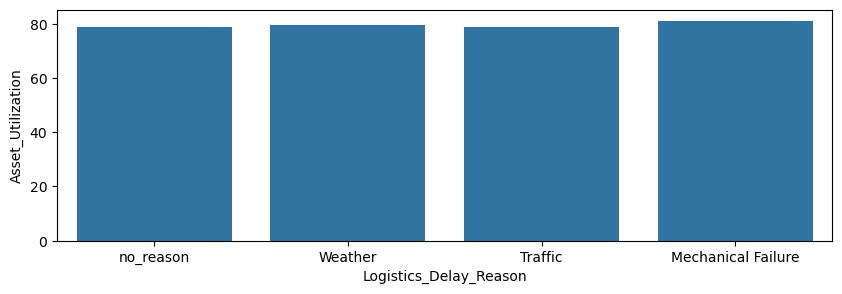

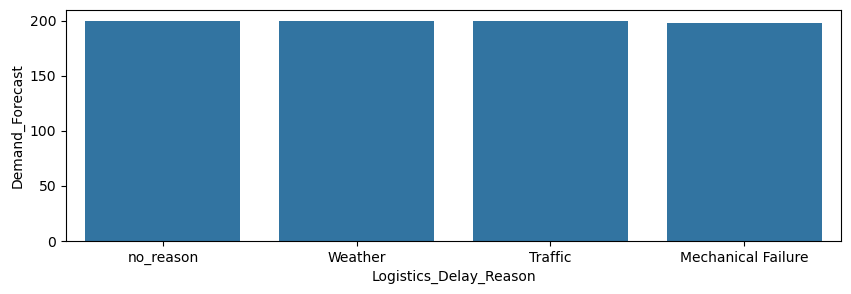

In [46]:
for i in nominal:
    for j in continuous:
        plt.figure(figsize = (10,3))
        sns.barplot(x = i,y = j,data = data,ci = False)
        plt.show()

#### Multivariant analysis

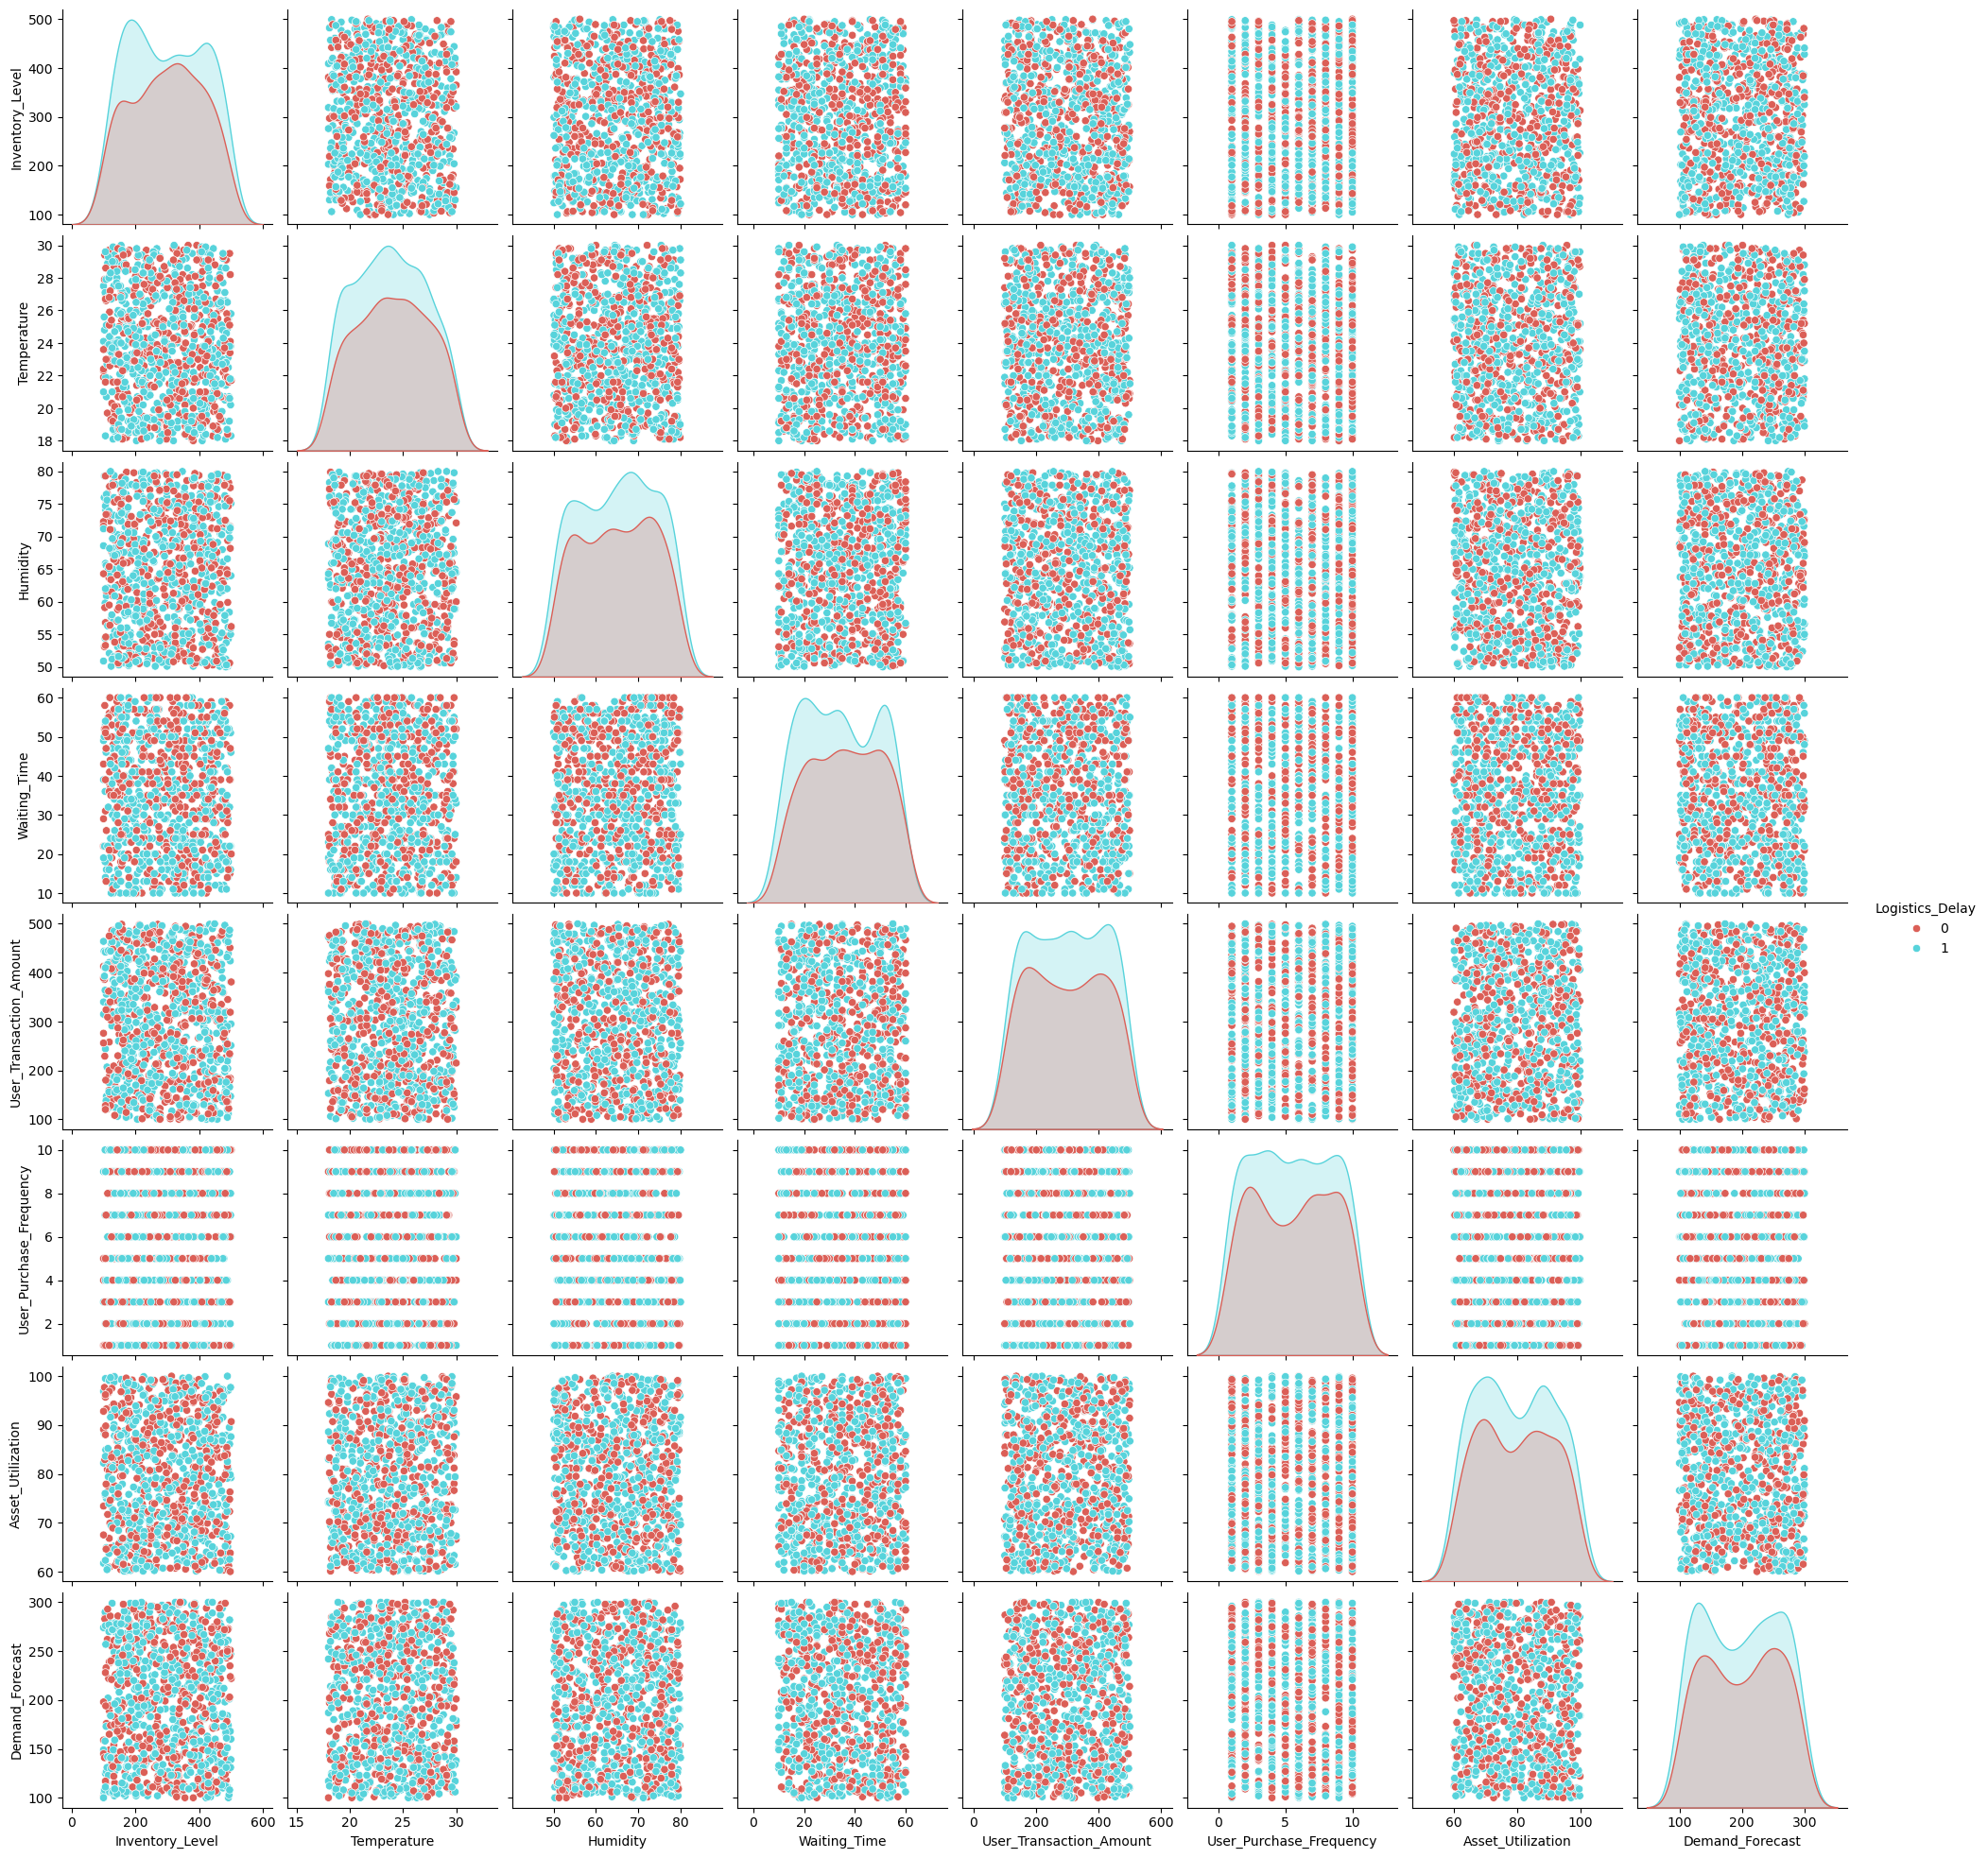

In [48]:
sns.pairplot(data = data,hue = 'Logistics_Delay',palette = 'hls')
plt.show()

#### Correlation Analysis

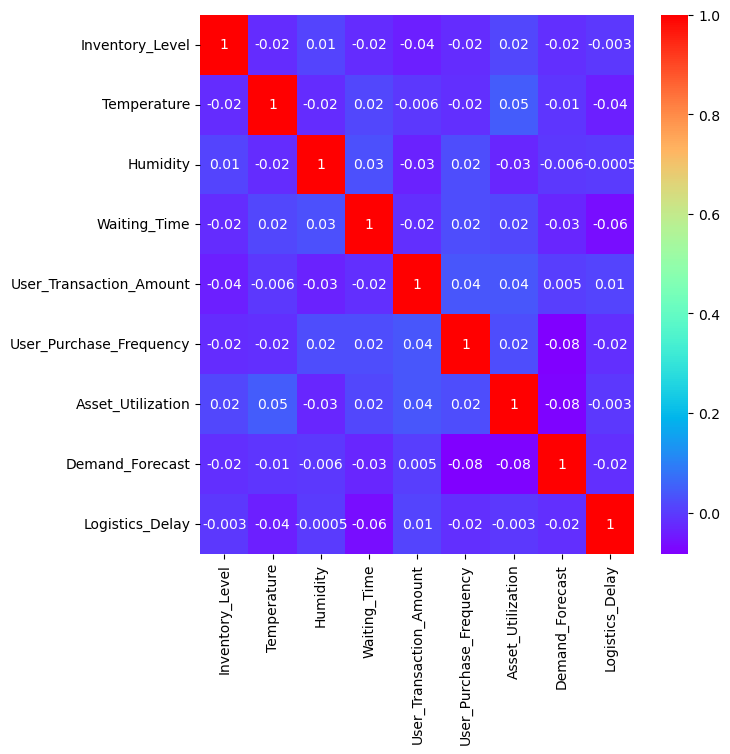

In [54]:
plt.figure(figsize = (7,7))
sns.heatmap(data.corr(numeric_only = True),cmap = 'rainbow',annot = True,fmt = '.1g')
plt.show()

In [55]:
data.columns

Index(['Asset_ID', 'Inventory_Level', 'Shipment_Status', 'Temperature',
       'Humidity', 'Traffic_Status', 'Waiting_Time', 'User_Transaction_Amount',
       'User_Purchase_Frequency', 'Logistics_Delay_Reason',
       'Asset_Utilization', 'Demand_Forecast', 'Logistics_Delay'],
      dtype='object')

In [85]:
x = data.drop(columns = 'Logistics_Delay')
y = data[['Logistics_Delay']]

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder

In [87]:
continuous_pipeline = Pipeline([
    ('scaler',StandardScaler())
])

discrete_pipeline = Pipeline([
    ('scaler',StandardScaler())
])

nominal_pipeline= Pipeline([
    ('encoder',OneHotEncoder(handle_unknown = 'ignore'))
     ])

ordinal_pipeline1 = Pipeline([
('encoder',OrdinalEncoder(categories = order1))
     ])
ordinal_pipeline2 = Pipeline([
    ('encoder',OrdinalEncoder(categories = order2))
     ])

In [88]:
from sklearn.compose import ColumnTransformer

In [89]:
continuous = ['Inventory_Level','Temperature', 'Humidity','Waiting_Time','User_Transaction_Amount','Asset_Utilization','Demand_Forecast']
discrete = ['User_Purchase_Frequency']
ordinal = ['Shipment_Status','Traffic_Status']
nominal = ['Asset_ID','Logistics_Delay_Reason']
order1 = ['Delayed','In Transit','Delivered']
order2 = ['Heavy','Detour','Clear']

In [90]:
preprocessor = ColumnTransformer([
    ('continuous',continuous_pipeline,continuous),
    ('discrete',discrete_pipeline,discrete),
    ('nominal',nominal_pipeline,nominal),
    ('ordinal1',ordinal_pipeline1,['Shipment_Status']),
    ('ordinal2',ordinal_pipeline2,['Traffic_Status'])
])

In [91]:
!pip install xgboost


In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [93]:
models = {'LogisticRegression':LogisticRegression(),
          'DecisionTreeClassifier':DecisionTreeClassifier(),
          'RandomForestClassifier':RandomForestClassifier(),
          'AdaBoostClassifier':AdaBoostClassifier(n_estimators=50),
          'XGBClassifier':XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
          'KNeighborsClassifier':KNeighborsClassifier(n_neighbors=5),
          'SVC':SVC(probability = True)
         }

In [94]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix

In [107]:
from sklearn.metrics import roc_curve,auc

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
def eval(true,pred):
    acc = accuracy_score(true,pred)
    pre = precision_score(true,pred)
    re = recall_score(true,pred)
    f = f1_score(true,pred)
    return acc,pre,re,f

Model: LogisticRegression
Accuracy score: 0.8866666666666667
precision_score: 0.8367346938775511
recall_score: 0.9879518072289156
f1 score: 0.9060773480662984
auc score: 1.0


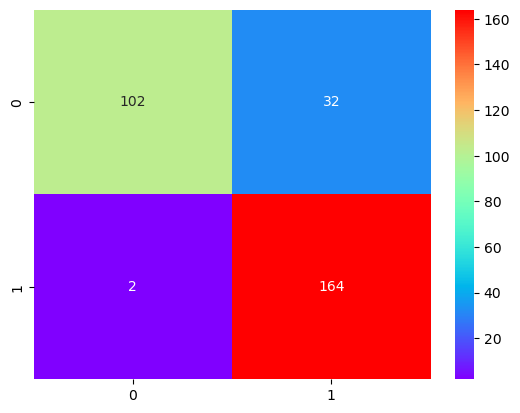

Model: DecisionTreeClassifier
Accuracy score: 1.0
precision_score: 1.0
recall_score: 1.0
f1 score: 1.0
auc score: 0.9342744110771444


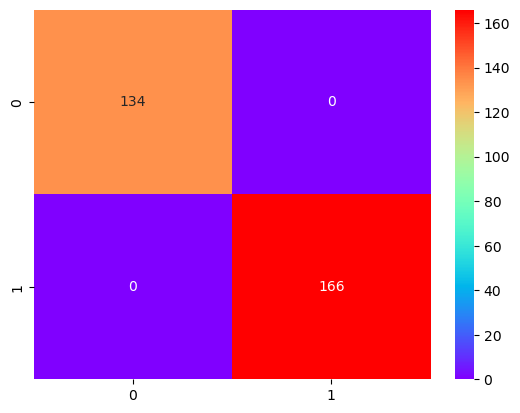

Model: RandomForestClassifier
Accuracy score: 1.0
precision_score: 1.0
recall_score: 1.0
f1 score: 1.0
auc score: 1.0


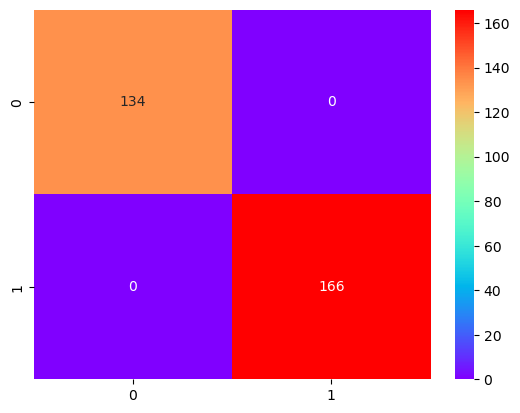

Model: AdaBoostClassifier
Accuracy score: 1.0
precision_score: 1.0
recall_score: 1.0
f1 score: 1.0
auc score: 1.0


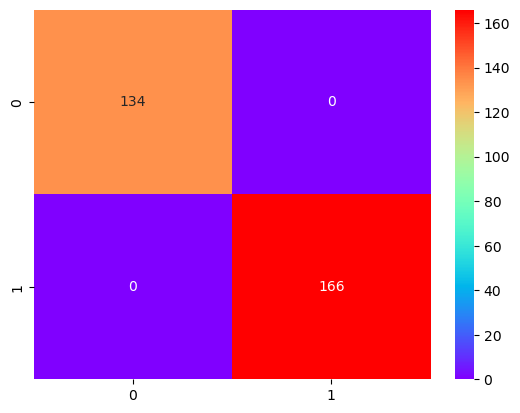

Model: XGBClassifier
Accuracy score: 1.0
precision_score: 1.0
recall_score: 1.0
f1 score: 1.0
auc score: 1.0


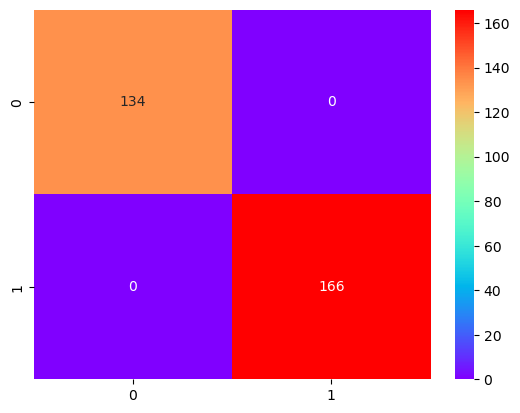

Model: KNeighborsClassifier
Accuracy score: 0.8433333333333334
precision_score: 0.8695652173913043
recall_score: 0.8433734939759037
f1 score: 0.8562691131498471
auc score: 1.0


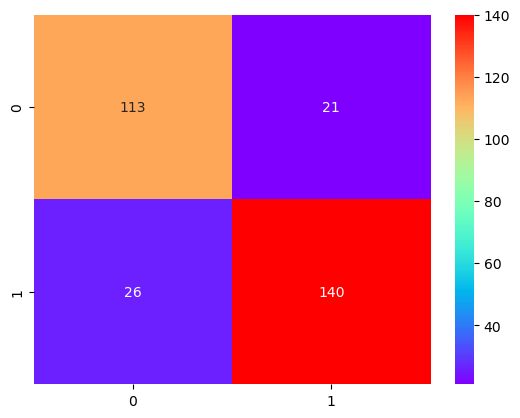

Model: SVC
Accuracy score: 0.9933333333333333
precision_score: 0.9880952380952381
recall_score: 1.0
f1 score: 0.9940119760479041
auc score: 0.9061994245639273


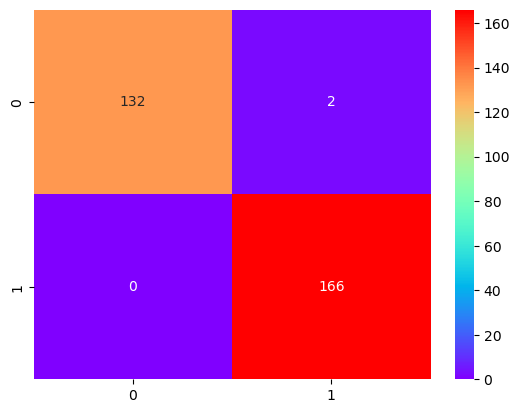

In [112]:
lst = []
for name,model in models.items():
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size = 0.70,random_state = 10)
    model_pipeline = Pipeline([
        ('preprocessor',preprocessor),
        ('model',model)
    ])
    model_pipeline.fit(xtrain,ytrain)
    pred = model_pipeline.predict(xtest)
    a,p,r,f1 = eval(ytest,pred)
    print(f'Model: {name}')
    print(f'Accuracy score: {a}')
    print(f'precision_score: {p}')
    print(f'recall_score: {r}')
    print(f'f1 score: {f1}')
    print(f'auc score: {auc_score}')
    sns.heatmap(confusion_matrix(ytest,pred),annot = True,cmap = 'rainbow',fmt = 'd')
    plt.show()
    predprob = model_pipeline.predict_proba(xtest)[:,1]
    fpr,tpr,_ = roc_curve(ytest,predprob)
    auc_score = auc(fpr,tpr)
    lst.append((name,a,p,r,f1,auc_score))

In [113]:
lst

[('LogisticRegression',
  0.8866666666666667,
  0.8367346938775511,
  0.9879518072289156,
  0.9060773480662984,
  0.9342744110771444),
 ('DecisionTreeClassifier', 1.0, 1.0, 1.0, 1.0, 1.0),
 ('RandomForestClassifier', 1.0, 1.0, 1.0, 1.0, 1.0),
 ('AdaBoostClassifier', 1.0, 1.0, 1.0, 1.0, 1.0),
 ('XGBClassifier', 1.0, 1.0, 1.0, 1.0, 1.0),
 ('KNeighborsClassifier',
  0.8433333333333334,
  0.8695652173913043,
  0.8433734939759037,
  0.8562691131498471,
  0.9061994245639273),
 ('SVC', 0.9933333333333333, 0.9880952380952381, 1.0, 0.9940119760479041, 1.0)]

In [ ]:
  lst.append((name,a,p,r,f1,auc_score))

In [115]:
df_metric = pd.DataFrame(lst)
df_metric.columns = ['Model','Accuracy','Precision','Recall','F1_score','AUC_score']
df_metric

Model  Accuracy  Precision    Recall  F1_score  AUC_score
0      LogisticRegression  0.886667   0.836735  0.987952  0.906077   0.934274
1  DecisionTreeClassifier  1.000000   1.000000  1.000000  1.000000   1.000000
2  RandomForestClassifier  1.000000   1.000000  1.000000  1.000000   1.000000
3      AdaBoostClassifier  1.000000   1.000000  1.000000  1.000000   1.000000
4           XGBClassifier  1.000000   1.000000  1.000000  1.000000   1.000000
5    KNeighborsClassifier  0.843333   0.869565  0.843373  0.856269   0.906199
6                     SVC  0.993333   0.988095  1.000000  0.994012   1.000000

In [118]:
for i in df_metric.columns[1:]:
    df_metric[i] = df_metric[i].round(2)

In [119]:
df_metric

Model  Accuracy  Precision  Recall  F1_score  AUC_score
0      LogisticRegression      0.89       0.84    0.99      0.91       0.93
1  DecisionTreeClassifier      1.00       1.00    1.00      1.00       1.00
2  RandomForestClassifier      1.00       1.00    1.00      1.00       1.00
3      AdaBoostClassifier      1.00       1.00    1.00      1.00       1.00
4           XGBClassifier      1.00       1.00    1.00      1.00       1.00
5    KNeighborsClassifier      0.84       0.87    0.84      0.86       0.91
6                     SVC      0.99       0.99    1.00      0.99       1.00

In [120]:
metrics = ['Accuracy','Precision','Recall','F1_score','AUC_score']

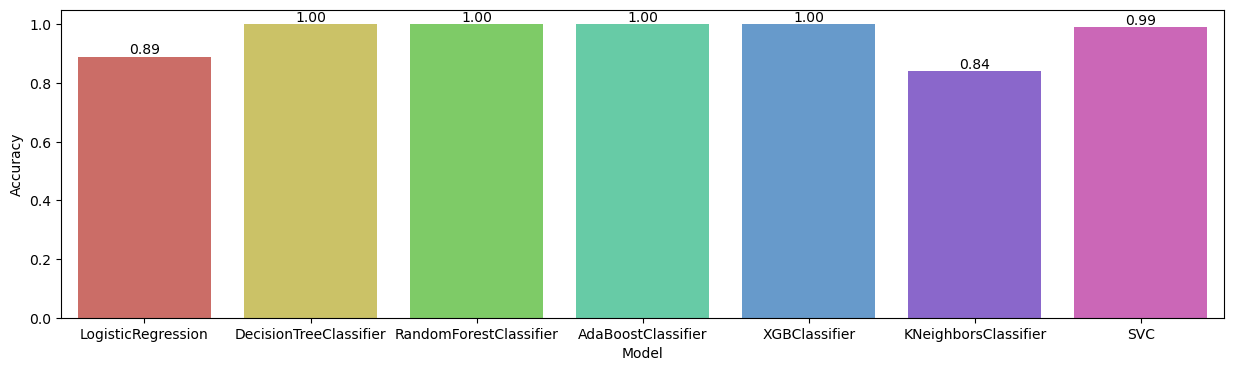

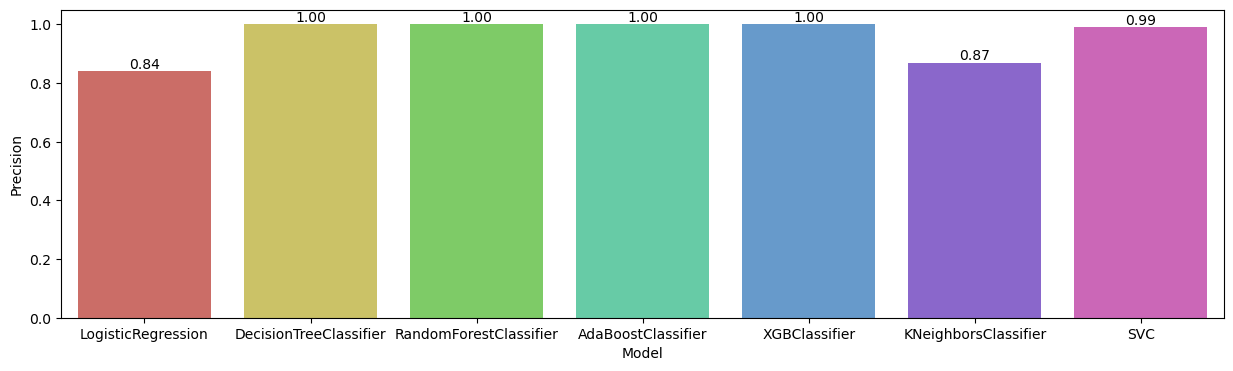

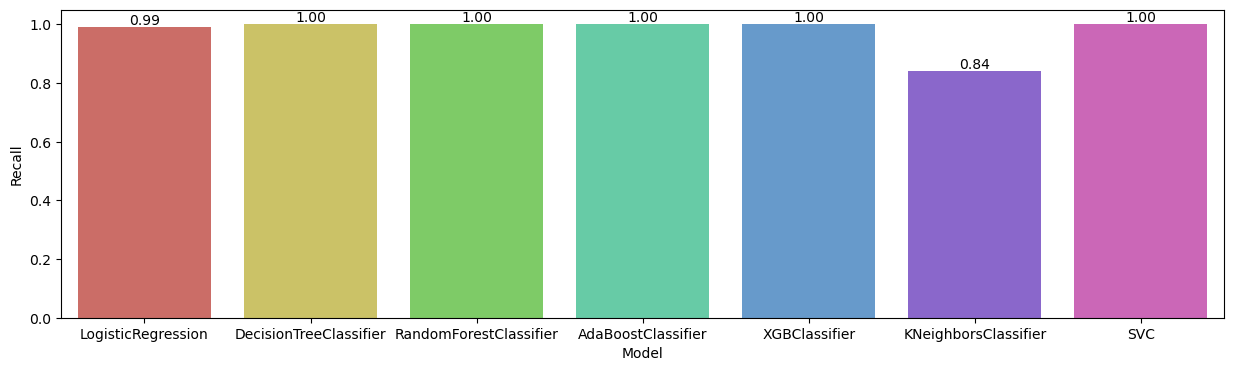

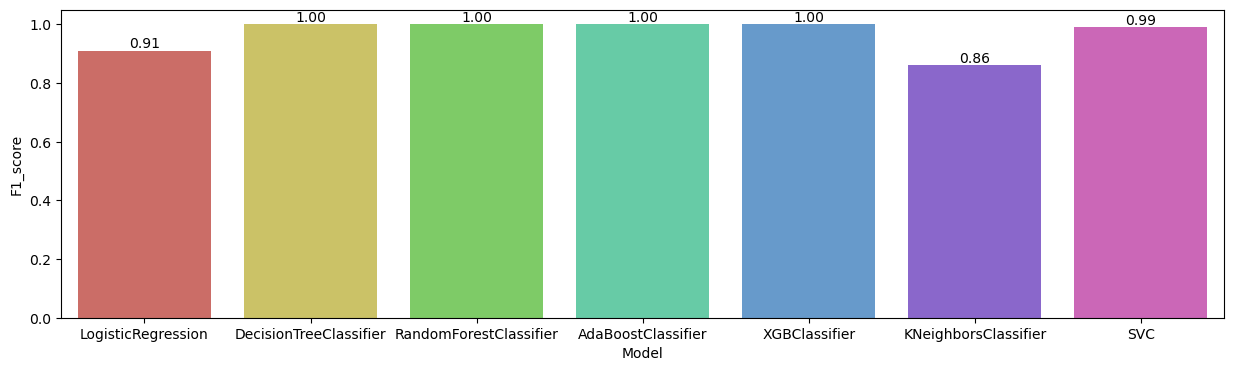

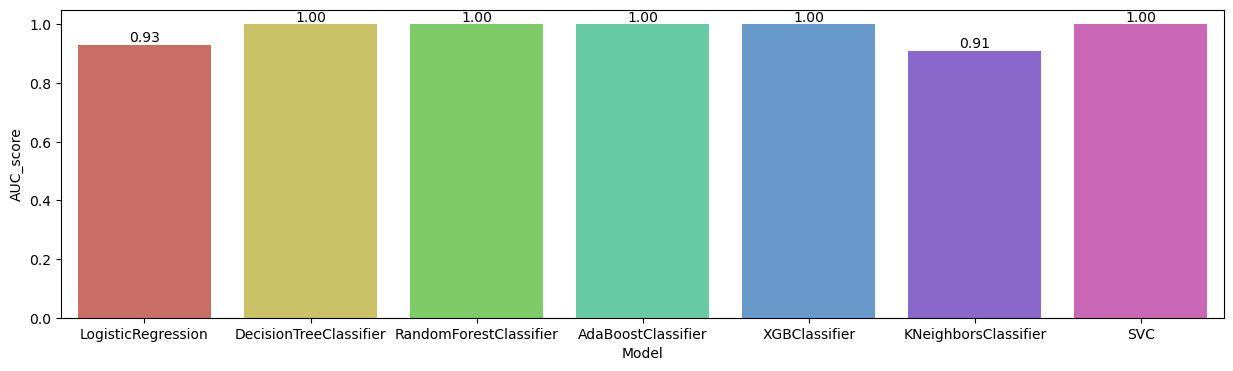

In [133]:
for i in metrics:
    plt.figure(figsize = (15,4))
    ax = sns.barplot(x = 'Model',y = i, data = df_metric,hue ='Model' ,palette = 'hls')
    for j in ax.containers:
        ax.bar_label(j,fmt = '%.2f')
    plt.show()
    

In [134]:
mod_pipeline = Pipeline([
        ('preprocessor',preprocessor),
        ('model',LogisticRegression())
    ])

In [135]:
mod_pipeline.fit(xtrain,ytrain)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('continuous',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Inventory_Level',
                                                   'Temperature', 'Humidity',
                                                   'Waiting_Time',
                                                   'User_Transaction_Amount',
                                                   'Asset_Utilization',
                                                   'Demand_Forecast']),
                                                 ('discrete',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['User_Purchase_Frequency']),
                                                 ('nominal',
                                                  Pip...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Asset_ID',
                                                   'Logistics_Delay_Reason']),
                                                 ('ordinal1',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder(categories=[['Delayed',
                                                                                               'In '
                                                                                               'Transit',
                                                                                               'Delivered']]))]),
                                                  ['Shipment_Status']),
                                                 ('ordinal2',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder(categories=[['Heavy',
                                                                                               'Detour',
                                                                                               'Clear']]))]),
                                                  ['Traffic_Status'])])),
                ('model', LogisticRegression())])

In [136]:
import joblib

In [138]:
preprocessor = mod_pipeline.named_steps['preprocessor']
model = mod_pipeline.named_steps['model']

In [139]:
joblib.dump(preprocessor,'preprocessor.pkl')
joblib.dump(model,'model.pkl')

['model.pkl']